In [159]:
import pytrends
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pytrends.request import TrendReq
sns.reset_defaults()
matplotlib.rcParams.update({'font.size': 14})

In [160]:
ROLLING_WINDOW_LENGTH = 14

### Set out to determine if any relationship between COVID cases in the US and queries inputted for Are Masks Effective

#### Get Mask Search Volume

In [95]:
def get_search_volume_df_in_us(search_query, start_date, end_date):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([search_query], cat=0, timeframe=f'{start_date} {end_date}', geo='US', gprop='')
    df = pytrends.interest_over_time().reset_index()
    return df

In [96]:
masks_searches = get_search_volume_df_in_us("Are Masks Effective", "2019-12-01", "2020-07-01")

In [97]:
masks_searches.head()

,date,Are Masks Effective,isPartial
0,2019-12-01,0,False
1,2019-12-02,0,False
2,2019-12-03,0,False
3,2019-12-04,0,False
4,2019-12-05,0,False


In [114]:
def clean_up_df_and_generate_rolling_avg(df):
    new_df = df.copy()
    new_df.columns = ["date", "search_strength", "isPartial"]
    new_df.loc[:, "rolling_search"] = new_df.loc[:, "search_strength"].rolling(ROLLING_WINDOW_LENGTH).mean()
    return new_df

In [116]:
masks_df_final = clean_up_df_and_generate_rolling_avg(masks_searches)
masks_df_final.head()

,date,search_strength,isPartial,rolling_search
0,2019-12-01,0,False,NaN
1,2019-12-02,0,False,NaN
2,2019-12-03,0,False,NaN
3,2019-12-04,0,False,NaN
4,2019-12-05,0,False,NaN


### Bring in daily counts of COVID

In [109]:
def bring_in_covid_us_data_with_new_counts():
    data_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
    df = pd.read_csv(data_url, parse_dates=["date"])
    df.loc[:, "new_cases"] = df.loc[:, "cases"].diff()
    df.loc[:, "new_cases_rolling"] = df.loc[:, "new_cases"].rolling(ROLLING_WINDOW_LENGTH).mean()
    return df

In [117]:
us_cases = bring_in_covid_us_data_with_new_counts()
us_cases.head()

,date,cases,deaths,new_cases,new_cases_rolling
0,2020-01-21,1,0,NaN,NaN
1,2020-01-22,1,0,0.0,NaN
2,2020-01-23,1,0,0.0,NaN
3,2020-01-24,2,0,1.0,NaN
4,2020-01-25,3,0,1.0,NaN


In [171]:
def plot_searches_and_cases_on_same_plot(cases_dates, cases_counts, searches_dates, searches_counts, title):
    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax2 = ax1.twinx()
    ax1.plot(cases_dates, cases_counts, label="US New Cases", color="green")
    ax2.plot(searches_dates, searches_counts, label="Search Volume", color="blue")
    plt.title(title)
    ax1.set_ylabel('US New Cases')
    ax2.set_ylabel('Search Volume')
    ax1.figure.legend()
    plt.show()

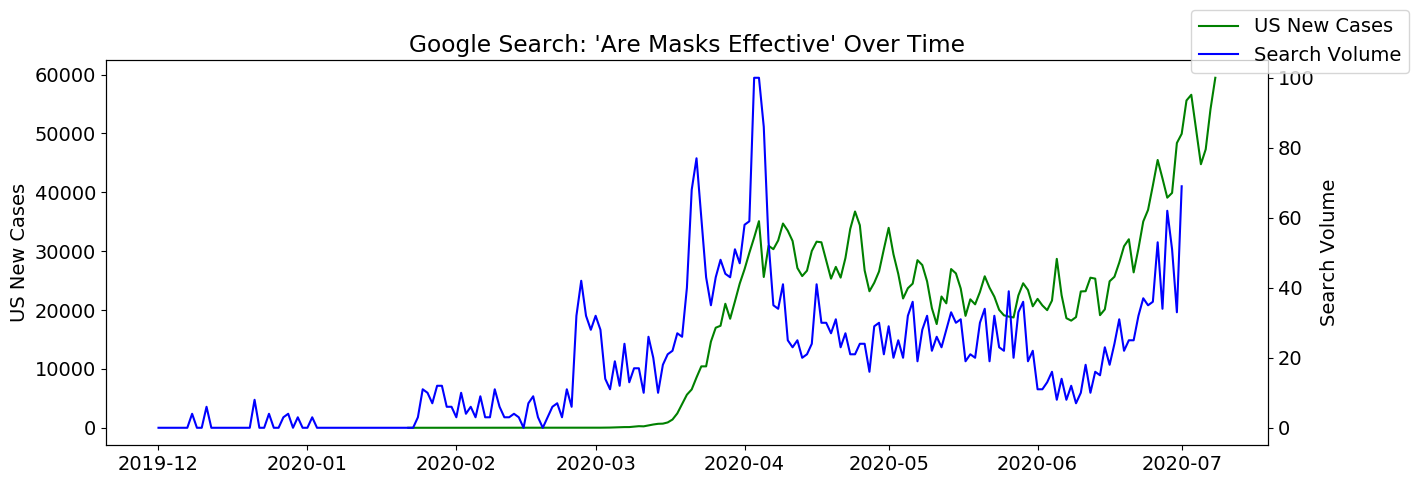

In [172]:
plot_searches_and_cases_on_same_plot(
    us_cases.date, 
    us_cases.new_cases,
    masks_df_final.date,
    masks_df_final.search_strength,
    title="Google Search: 'Are Masks Effective' Over Time"
)

Let's remove the day to day varation by applying rolling window average

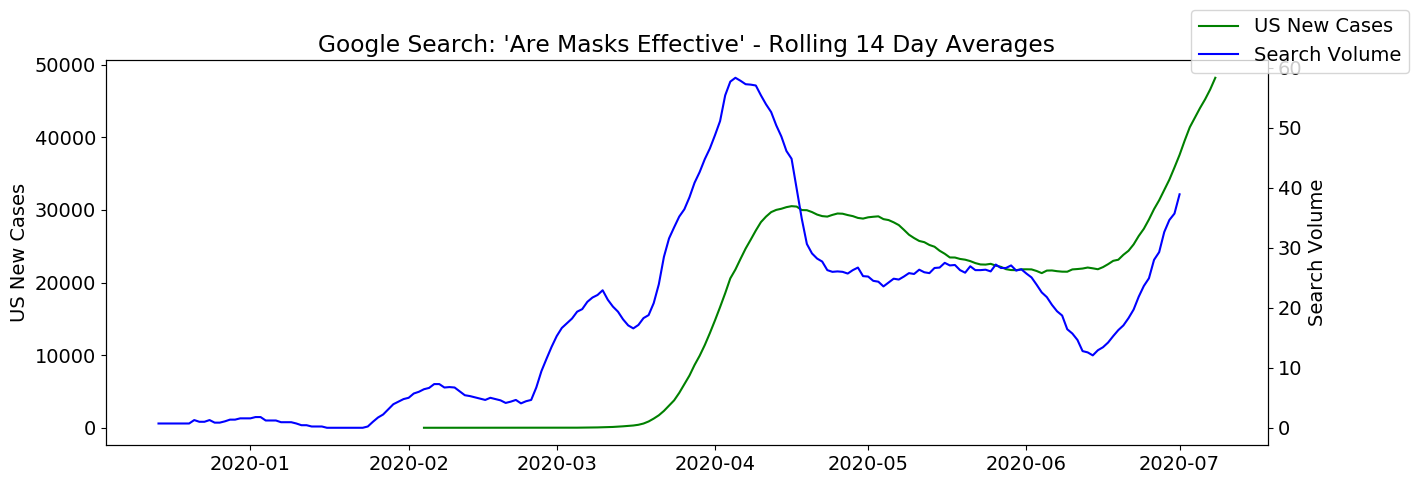

In [173]:
plot_searches_and_cases_on_same_plot(
    us_cases.date, 
    us_cases.new_cases_rolling,
    masks_df_final.date,
    masks_df_final.rolling_search,
    title="Google Search: 'Are Masks Effective' - Rolling 14 Day Averages"
)

In [ ]:
#TODO: Look by State using State Case Rates to see which states this pattern holds for